Instalacja biblioteki Prettymaps

In [ ]:
!pip install -e "git+https://github.com/marceloprates/prettymaps#egg=prettymaps"

Pobranie specjalnej czcionki

In [ ]:
!wget -O PermanentMarker-Regular.ttf https://github.com/marceloprates/prettymaps/raw/main/assets/Permanent_Marker/PermanentMarker-Regular.ttf

Przykład 1. - podstawowy

In [ ]:
import matplotlib.pyplot as plt
from prettymaps import plot

# zdefiniowanie przestrzeni mapy
fig, ax = plt.subplots(figsize = (10, 10), constrained_layout = True)
# MAPA
map1 = plot(
    # Adres:
    #'Plac Grunwaldzki, Szczecin, Polska',
    # współrzędne geograficzne:
    (53.428433469351, 14.54659327488271),
    # kształt obszaru mapy
    circle = True,
    # promień okręgu/kwadratu w którym tworzymy mapę
    radius = 1000,
    # Matplotlib axis
    ax = ax,
    # wybór warstw OpenStreetMap
    layers = {
            # obrys kształtu mapy
            'perimeter': {},
            # ulice i ich szerokości
            'streets': {
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'residential': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 1,
                    'footway': .5,
                }
            },
            # Inne warstwy:
            # {'tags': {KEY_OSM: VALUE_OSM}}
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': False},
            'water': {'tags': {'natural': ['water', 'bay']}},
            'green': {'tags': {'landuse': 'grass', 'natural': ['island', 'wood'], 'leisure': 'park'}},
            'forest': {'tags': {'landuse': 'forest'}},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}}
        },
        # parametry stylizacyjne dla każdej warstwy:
        # wpisz nazwę jednej z warstw którą wcześniej zdefiniowałeś, a nastepnie nadaj jej styl
        # fc - facecolor (kolor wypełnienia), ec - edgecolor (kolor obrysu), lw - linewidth (grubość obrysu)
        # alpha - przezroczystość (0-1), zorder - kolejność wyświetlania warstw
        # palette - lista kolorów, które będą losowo przyporządkowane do obiektów z danej warstwy
        style = {
            'background': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'zorder': -1},
            'perimeter': {'fill': False, 'ec': '#373732', 'lw': 5, 'zorder': 5},
            'green': {'fc': '#15ad38', 'ec': '#2f3737', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#1d8009', 'ec': '#2f3737', 'lw': 1, 'zorder': 1},
            'water': {'fc': '#39a5d7', 'ec': '#2F3737', 'hatch_c': '#85c9e6', 'lw': 1, 'zorder': 2},
            'parking': {'fc': '#F2F4CB', 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},
            'building': {'palette': ['#4d2f26', '#75483b', '#9c6656'], 'ec': '#2F3737', 'lw': .5, 'zorder': 4}
        }
)

plt.savefig('szczecin.png')
plt.show()

Przykład 2. - podstawowy

In [ ]:
import matplotlib.pyplot as plt
from prettymaps import plot

fig, ax = plt.subplots(figsize = (10, 10), constrained_layout = True)
map2 = plot(
    'Praça Ferreira do Amaral, Macau',
    radius = 1100,
    circle = True,
    ax = ax,
    layers = {
            'perimeter': {},
            'streets': {
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'residential': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 2,
                    'footway': 1,
                }
            },
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': False},
            'water': {'tags': {'natural': ['water', 'bay']}},
            'green': {'tags': {'landuse': 'grass', 'natural': ['island', 'wood'], 'leisure': 'park'}},
            'forest': {'tags': {'landuse': 'forest'}},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}}
        },
        style = {
            'background': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'hatch': 'ooo...', 'zorder': -1},
            'perimeter': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'lw': 0, 'hatch': 'ooo...',  'zorder': 0},
            'green': {'fc': '#D0F1BF', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#64B96A', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
            'water': {'fc': '#a1e3ff', 'ec': '#2F3737', 'hatch': 'ooo...', 'hatch_c': '#85c9e6', 'lw': 1, 'zorder': 2},
            'parking': {'fc': '#F2F4CB', 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},
            'building': {'palette': ['#FFC857', '#E9724C', '#C5283D'], 'ec': '#2F3737', 'lw': .5, 'zorder': 4},
        }
)

plt.savefig('macau.png')
plt.show()

Przykład 3. - zaawansowany

f:\studia\labmasters\prettymaps-workshop\venv\src\prettymaps\prettymaps\draw.py:974: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(
findfont: Font family 'Ubuntu Mono' not found.
findfont: Font family 'Ubuntu Mono' not found.
findfont: Font family 'Ubuntu Mono' not found.
findfont: Font family 'Ubuntu Mono' not found.
findfont: Font family 'Ubuntu Mono' not found.
findfont: Font family 'Ubuntu Mono' not found.
findfont: Font family 'Ubuntu Mono' not found.
findfont: Font family 'Ubuntu Mono' not found.
findfont: Font family 'Ubuntu Mono' not found.
findfont: Font family 'Ubuntu Mono' not found.
findfont: Font family 'Ubuntu Mono' not found.
findfont: Font family 'Ubuntu Mono' not found.


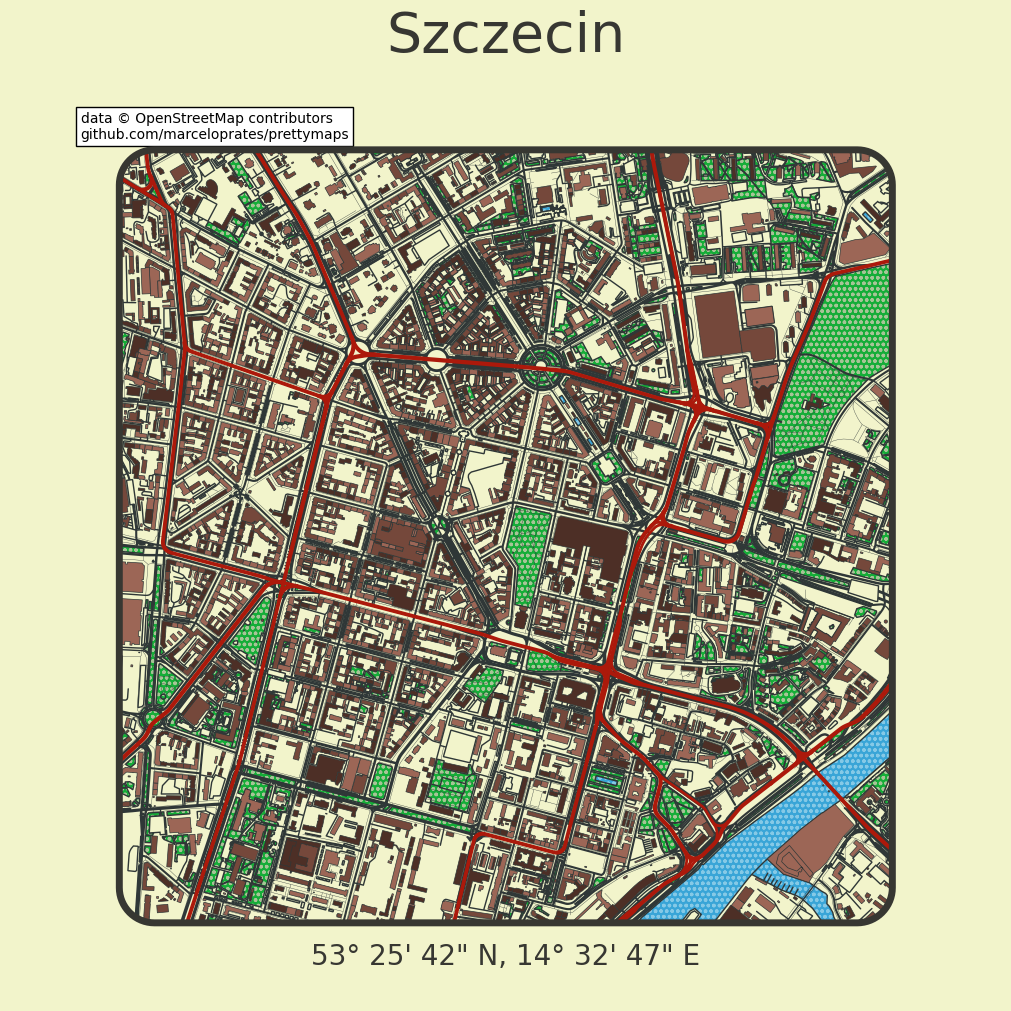

In [59]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from prettymaps import plot

# zdefiniowanie przestrzeni mapy
fig, ax = plt.subplots(figsize = (10, 10), constrained_layout = True)
# MAPA
map3 = plot(
    # Adres:
    #'Plac Grunwaldzki, Szczecin, Polska',
    # współrzędne geograficzne
    (53.428433469351, 14.54659327488271),
    # kształt obszaru mapy
    circle = False,
    # zaokrąglenie narożników
    dilate = 100,
    # promień okręgu/kwadratu w którym tworzymy mapę
    radius = 1000,
    # Matplotlib axis
    ax = ax,
    # wybór warstw OpenStreetMap
    layers = {
            # obrys kształtu mapy
            'perimeter': {},
            # ulice i ich szerokości
            'streets': {
                # samodzielny wybór typów dróg
                'custom_filter': '["highway"~"motorway|trunk|primary|secondary|tertiary|residential|construction|service|unclassified|pedestrian|footway"]',
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'residential': 3,
                    'construction': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 1,
                    'footway': .5,
                }
            },
            # Inne warstwy:
            # {'tags': {KEY_OSM: VALUE_OSM}}
            'trams': {'tags': {'railway': ['tram', 'construction']}},
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': False},
            'water': {'tags': {'natural': ['water', 'bay']}},
            'green': {'tags': {'landuse': 'grass', 'natural': ['island', 'wood'], 'leisure': 'park'}},
            'forest': {'tags': {'landuse': 'forest'}},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}}
        },
        # parametry stylizacyjne dla każdej warstwy:
        # wpisz nazwę jednej z warstw którą wcześniej zdefiniowałeś, a nastepnie nadaj jej styl
        # fc - facecolor (kolor wypełnienia), ec - edgecolor (kolor obrysu), lw - linewidth (grubość obrysu)
        # alpha - przezroczystość (0-1), zorder - kolejność wyświetlania warstw
        # palette - lista kolorów, które będą losowo przyporządkowane do obiektów z danej warstwy
        style = {
            'background': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'lw': 0, 'zorder': -1},
            'perimeter': {'fill': False, 'ec': '#373732', 'lw': 5, 'zorder': 5},
            'green': {'fc': '#15ad38', 'ec': '#2f3737', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#1d8009', 'ec': '#2f3737', 'lw': 1, 'zorder': 1},
            'water': {'fc': '#39a5d7', 'ec': '#2F3737', 'hatch_c': '#85c9e6', 'lw': 1, 'zorder': 2},
            'parking': {'fc': '#F2F4CB', 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},
            'building': {'palette': ['#4d2f26', '#75483b', '#9c6656'], 'ec': '#2F3737', 'lw': .5, 'zorder': 4},
            'trams': {'fill': False, 'ec': '#ac190b', 'lw': 2, 'zorder': 4}
        }
)

# zmiana tła wykresu
fig.patch.set_facecolor('#F2F4CB')
# główny tytuł
plt.suptitle(
    'Szczecin',
    color = '#373732',
    size = 40
)
# podtytuł
plt.title(
    '53° 25\' 42\" N, 14° 32\' 47\" E',
    color = '#373732',
    size = 20, y = 0.03
)

plt.savefig('szczecin2.png')
plt.show()

Przykład 4. - gotowe style

In [ ]:
from prettymaps import presets, preset
presets()

In [57]:
preset('heerhugowaard')

|            | layers                                                                                                                                                                                                          | style                                                                                                                                                                                                                                                                         | circle          | radius         | dilate         |
|:-----------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:----------------|:---------------|:---------------|
| perimeter  | {}<br>                                                                                                                                                                                                          | fill: false<br>lw: 0<br>zorder: 0<br>                                                                                                                                                                                                                                         | null<br>...<br> | 800<br>...<br> | 100<br>...<br> |
| streets    | width:<br>  cycleway: 3.5<br>  footway: 1<br>  motorway: 5<br>  pedestrian: 2<br>  primary: 4.5<br>  residential: 3<br>  secondary: 4<br>  service: 2<br>  tertiary: 3.5<br>  trunk: 5<br>  unclassified: 2<br> | alpha: 1<br>ec: '<span style="background-color:#475657; color:#fff">#475657</span>'<br>fc: '<span style="background-color:#2F3737; color:#fff">#2F3737</span>'<br>lw: 0<br>zorder: 4<br>                                                                                      |                 |                |                |
| building   | tags:<br>  building: true<br>  landuse: construction<br>                                                                                                                                                        | ec: '<span style="background-color:#2F3737; color:#fff">#2F3737</span>'<br>lw: 0.5<br>palette:<br>- '<span style="background-color:#433633; color:#fff">#433633</span>'<br>- '<span style="background-color:#FF5E5B; color:#000">#FF5E5B</span>'<br>zorder: 5<br>             |                 |                |                |
| water      | tags:<br>  natural:<br>  - water<br>  - bay<br>                                                                                                                                                                 | ec: '<span style="background-color:#2F3737; color:#fff">#2F3737</span>'<br>fc: '<span style="background-color:#a8e1e6; color:#000">#a8e1e6</span>'<br>hatch: ooo...<br>hatch_c: '<span style="background-color:#9bc3d4; color:#000">#9bc3d4</span>'<br>lw: 1<br>zorder: 3<br> |                 |                |                |
| forest     | tags:<br>  landuse: forest<br>                                                                                                                                                                                  | ec: '<span style="background-color:#2F3737; color:#fff">#2F3737</span>'<br>fc: '<span style="background-color:#64B96A; color:#000">#64B96A</span>'<br>lw: 1<br>zorder: 2<br>                                                                                                  |                 |                |                |
| green      | tags:<br>  landuse:<br>  - grass<br>  - orchard<br>  leisure: park<br>  natural:<br>  - island<br>  - wood<br>                                                                                                  | ec: '<span style="background-color:#2F3737; color:#fff">#2F3737</span>'<br>fc: '<span style="background-color:#8BB174; color:#000">#8BB174</span>'<br>hatch: ooo...<br>hatch_c: '<span style="background-color:#A7C497; color:#000">#A7C497</span>'<br>lw: 1<br>zorder: 1<br> |                 |                |                |
| beach      | tags:<br>  natural: beach<br>                                                                                                                                                                                   | ec: '<span style="background-color:#2F3737; color:#fff">#2F3737</span>'<br>fc: '<span style="background-color:#FCE19C; color:#000">#FCE19C</span>'<br>hatch: ooo...<br>hatch_c: '<span style="background-color:#d4d196; color:#000">#d4d196</span>'<br>lw: 1<br>zorder: 3<br> |                 |                |                |
| parking    | tags:<br>  amenity: parking<br>  highway: pedestrian<br>  man_made: pier<br>                                                                                                                                    | ec: '<span style="background-color:#2F3737; color:#fff">#2F3737</span>'<br>fc: '<span style="background-color:#F2F4CB; color:#000">#F2F4CB</span>'<br>lw: 1<br>zorder: 3<br>                                                                                                  |                 |                |                |
| background | .nan<br>...<br>                                                                                                                                                                                                 | fc: '<span style="background-color:#F2F4CB; color:#000">#F2F4CB</span>'<br>zorder: -1<br>                                                                                                                                                                                     |                 |                |                |

In [ ]:
map4 = plot(
    'Stad van de Zon, Heerhugowaard, Netherlands',
    preset = 'heerhugowaard',
)
plt.show()